# Dataverwerking

## Importeren modules

In [80]:
# For interactive plots
%matplotlib widget

In [81]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import models
from scipy.stats import chi2
import csv

## Data (uit labjournaal) invoeren

In [82]:
#import peaks from spectrum
list_count_A = []
L_pulseheight = []
# Open the CSV file
with open('cal_Ge_Na_2.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, counts_ch_A, counts_ch_B = row

        list_count_A.append(float(counts_ch_A))
        L_pulseheight.append(float(pulseheigt))
        # print(count_A)
    
max_A_1 = max(list_count_A)
index_max_A1 = list_count_A.index(max_A_1)

max_A_2 = max(list_count_A[100:])
index_max_A2 = list_count_A.index(max_A_2, index_max_A1 +2)

pulseheight_A1 = float(L_pulseheight[index_max_A1])
pulseheight_A2 = float(L_pulseheight[index_max_A2])

print(pulseheight_A1, pulseheight_A2)

print(f"De eerste piek heeft {max_A_1} counts en een pulseheight van {pulseheight_A1} mV")
print(f"De tweede piek heeft {max_A_2} counts en een pulseheight van {pulseheight_A2} mV")

189.26470588235296 468.38235294117646
De eerste piek heeft 2142.0 counts en een pulseheight van 189.26470588235296 mV
De tweede piek heeft 321.0 counts en een pulseheight van 468.38235294117646 mV


In [83]:
# energy in keV
energy = [511, 1275]

# pulse heights in mV
pulse_height = [pulseheight_A1, pulseheight_A2]

### Pandas DataFrame

In [84]:
# Create the Pandas DataFrame with column names are provided explicitly
df = pd.DataFrame({'energy': energy, 
                   'Pulse height': pulse_height})
 
# Print DataFrame
df

,energy,Pulse height
0,511,189.264706
1,1275,468.382353


### Onzekerheid toevoegen

In [85]:
# Error of pulse 
df['err_pulse'] = abs(L_pulseheight[2]-L_pulseheight[3])/2

# Error of energy
a = 0.36533723
df['err_energy'] = (abs(L_pulseheight[2]-L_pulseheight[3])/2)/a

# Print DataFrame
df

,energy,Pulse height,err_pulse,err_energy
0,511,189.264706,1.911765,5.232877
1,1275,468.382353,1.911765,5.232877


### Diagram

(0.0, 500.0)

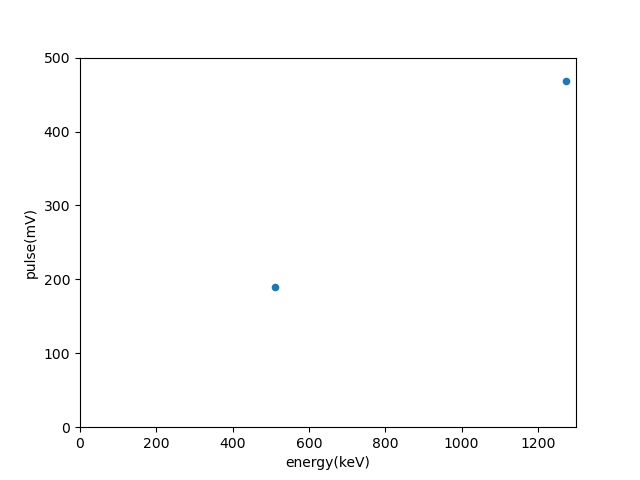

In [86]:
# Create diagram 
ax = df.plot.scatter('energy', 'Pulse height', xerr='err_energy', yerr='err_pulse')

# Set axis labels
ax.set_xlabel('energy(keV)')
ax.set_ylabel('pulse(mV)')

# Set axis view limits
ax.set_xlim(0, 1300)
ax.set_ylim(0, 500)

## Fitten

\begin{equation}
pulseheight = a*energy + b
\end{equation}

### Fitfunctie in python

In [87]:
# Define fit function
def fit_function (energy, a, b):
    pulse_height = a*energy + b
    return pulse_height

# Create a model from the fit function
MI_model = models.Model(fit_function, name="fit_Na22")

### Fitten aan de data

In [88]:
# Use the model to fit the data
fit_result = MI_model.fit(df['Pulse height'], energy=df['energy'], weights=1/df['err_pulse'], a=0.36533723, b=2.57737912)

### Plot fitresultaat

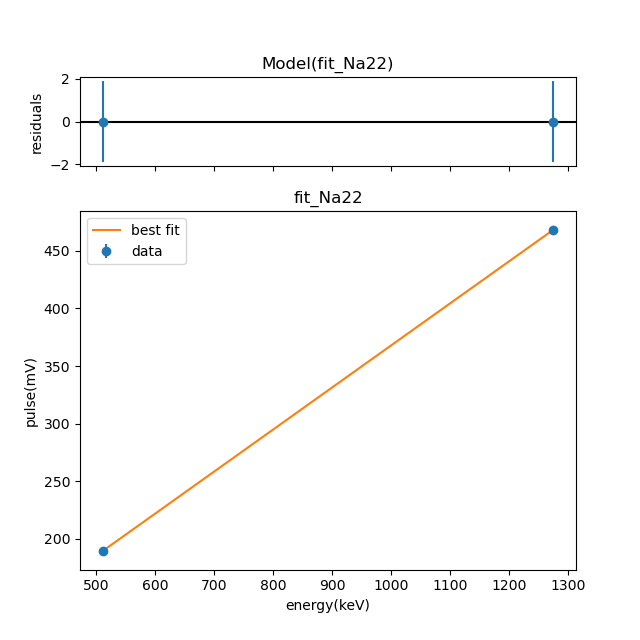

In [89]:
# plot fit including residuals
fit_result.plot()

# Set axis labels
plt.xlabel("energy(keV)")
plt.ylabel("pulse(mV)")

# Set axis view limits


# Remove title
plt.title("fit_Na22");

### Fitresultaat en statistiek

In [90]:
fit_result

Controleren met Cs-137

In [91]:
#import peaks from spectrum
list_count_A_CS = []
L_pulseheight_CS = []
# Open the CSV file
with open('cal_Ge_Cs_2.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, counts_ch_A, counts_ch_B = row

        list_count_A_CS.append(float(counts_ch_A))
        L_pulseheight_CS.append(float(pulseheigt))
        # print(count_A)
    
max_A_1_CS = max(list_count_A_CS)
index_max_A1_CS = list_count_A_CS.index(max_A_1_CS)

max_A_2_CS = max(list_count_A_CS[100:])
index_max_A2_CS = list_count_A_CS.index(max_A_2_CS, index_max_A1_CS +2)

pulseheight_A1_CS = float(L_pulseheight_CS[index_max_A1_CS])
pulseheight_A2_CS = float(L_pulseheight_CS[index_max_A2_CS])

print(pulseheight_A1_CS, pulseheight_A2_CS)

print(f"De grote piek heeft {max_A_1_CS} counts en een pulseheight van {pulseheight_A1_CS} mV")


242.79411764705884 533.3823529411766
De grote piek heeft 6445.0 counts en een pulseheight van 242.79411764705884 mV


In [92]:
a =0.36533723
b =	2.57737912


pulse_height_Theory = a * 662 + b
print(pulse_height_Theory)
#Dit valt in de foutmarge van ongeveer 2!!!!!!!!!
print(pulseheight_A1_CS-pulse_height_Theory)



244.43062538
-1.636507732941169


bepalen onbekend

In [93]:
#import peaks from spectrum
list_count_A = []
L_pulseheight = []
# Open the CSV file
with open('book4_test_1.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, counts_ch_A, counts_ch_B = row

        list_count_A.append(float(counts_ch_A))
        L_pulseheight.append(float(pulseheigt))
        # print(count_A)
    
max_A_1 = max(list_count_A)
index_max_A1 = list_count_A.index(max_A_1)

max_A_2 = max(list_count_A[index_max_A1+2:])
index_max_A2 = list_count_A.index(max_A_2, index_max_A1 )

pulseheight_A1 = float(L_pulseheight[index_max_A1])
pulseheight_A2 = float(L_pulseheight[index_max_A2])

print(pulseheight_A1, pulseheight_A2)

print(f"De eerste piek heeft {max_A_1} counts en een pulseheight van {pulseheight_A1} mV")
print(f"De tweede piek heeft {max_A_2} counts en een pulseheight van {pulseheight_A2} mV")


a =0.36533723
b =	2.57737912

energy1 = (pulseheight_A1-b)/a
energy2 = (pulseheight_A2-b)/a
energy3 = (108.9705882352941-b)/a
energy4 = (32.5-b)/a
energy5 = (411.02941176470586-b)/a
energy6 = (644.2647058823529-b)/a
energy_FHMW = (4.05-b)/a
print(energy_FHMW)
print(energy1)
print(energy2)
print(energy3)
print(energy4)
print(energy5)
print(energy6)

131.91176470588238 223.6764705882353
De eerste piek heeft 893.0 counts en een pulseheight van 131.91176470588238 mV
De tweede piek heeft 643.0 counts en een pulseheight van 223.6764705882353 mV
4.030853576023445
354.0137028626466
605.1917880590361
291.2191815635491
81.90411056655792
1118.0137120016645
1756.4246785424875


2 uur meting boek 4


In [94]:
#import peaks from spectrum
list_count_A = []
L_pulseheight = []
# Open the CSV file
with open('book4_7200s.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, counts_ch_A, counts_ch_B = row

        list_count_A.append(float(counts_ch_A))
        L_pulseheight.append(float(pulseheigt))
        # print(count_A)
    
max_A_1 = max(list_count_A)
index_max_A1 = list_count_A.index(max_A_1)

max_A_2 = max(list_count_A[index_max_A1+2:])
index_max_A2 = list_count_A.index(max_A_2, index_max_A1 )

pulseheight_A1 = float(L_pulseheight[index_max_A1])
pulseheight_A2 = float(L_pulseheight[index_max_A2])

print(pulseheight_A1, pulseheight_A2)

print(f"De eerste piek heeft {max_A_1} counts en een pulseheight van {pulseheight_A1} mV")
print(f"De tweede piek heeft {max_A_2} counts en een pulseheight van {pulseheight_A2} mV")
a =0.36533723
b =	2.57737912
error_pulse = (L_pulseheight[3]-L_pulseheight[2])/2
error_energy = error_pulse/a

def energy(pulse):
    a =0.36533723
    b =	2.57737912
    energy = (pulse-b)/a 
    return energy
print(error_pulse)
print(error_energy)
print(f"{energy(110.29411764705883)} +- {error_energy}")
print(f"{energy(129.90196078431376)} +- {error_energy}")
print(f"{energy(223.03921568627453)} +- {error_energy}")
print(f"{energy(409.31372549019613)} +- {error_energy}")
print(f"{energy(644.607843137255)} +- {error_energy}")


129.90196078431376 223.03921568627453
De eerste piek heeft 15195.0 counts en een pulseheight van 129.90196078431376 mV
De tweede piek heeft 9812.0 counts en een pulseheight van 223.03921568627453 mV
2.450980392156862
6.708816378108692
294.84194240772786 +- 6.708816378108692
348.51247343259746 +- 6.708816378108692
603.4474958007278 +- 6.708816378108692
1113.3175405369886 +- 6.708816378108692
1757.3639128354232 +- 6.708816378108692


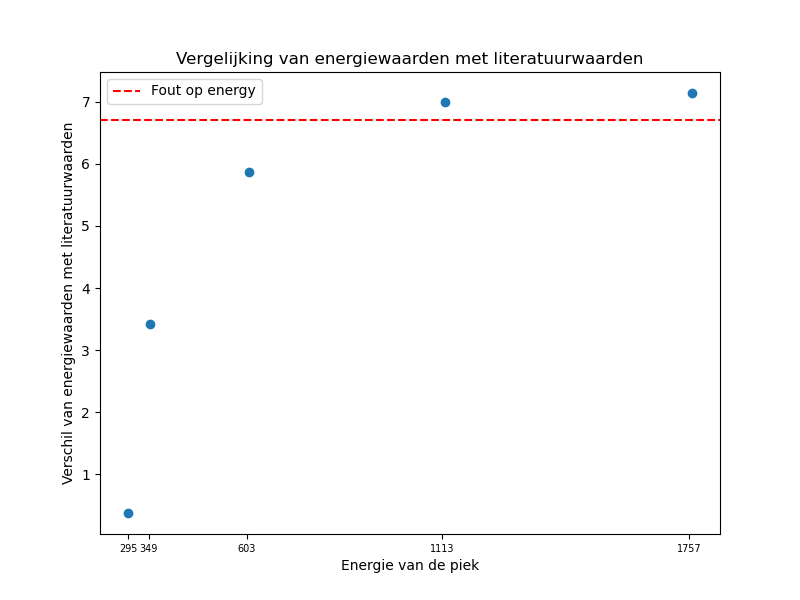

In [95]:
energy_measured = [294.84, 348.51,603.45,1113.32,1757.36]
energy_literature =[295, 351, 609, 1120, 1764]
dif_energy= [0.38, 3.42, 5.87, 6.99, 7.14]
plt.figure(figsize=(8,6))
plt.scatter(energy_literature, dif_energy, marker='o')
plt.axhline(y=6.708, color='r', linestyle='--', label="Fout op energy")
plt.xticks(energy_measured, fontsize=7)
plt.xlabel('Energie van de piek')
plt.ylabel('Verschil van energiewaarden met literatuurwaarden')
plt.title('Vergelijking van energiewaarden met literatuurwaarden')
plt.legend()

plt.show()

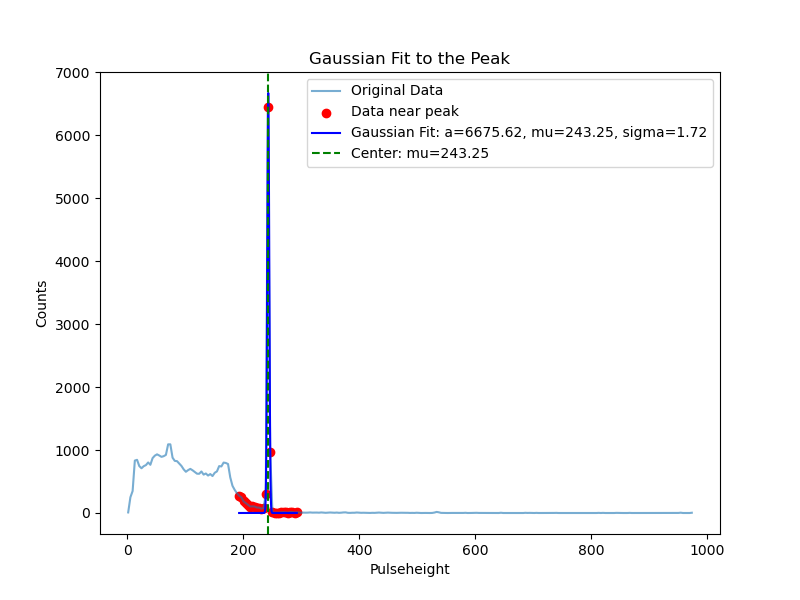

Amplitude (a): 6675.62
Center (mu): 243.25
Standard Deviation (sigma): 1.72


In [96]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'cal_Ge_Cs_2.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Extract the relevant columns
x = data['pulseheight']
y = data['counts_ch_A']

# Define the Gaussian function
def gaussian(x, a, mu, sigma):
    return a * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Identify the peak
peak_index = np.argmin(np.abs(x - 242.794))
peak_value = y[peak_index]

# Extract data around the peak (adjust window size as needed)
window = 50
mask = (x > 242.794 - window) & (x < 242.794 + window)
x_peak = x[mask]
y_peak = y[mask]

# Initial guesses for Gaussian parameters [amplitude, mean, stddev]
initial_guesses = [peak_value, 242.794, 10]

# Fit the Gaussian function to the data
popt, pcov = curve_fit(gaussian, x_peak, y_peak, p0=initial_guesses)

# Extract the optimized parameters
a_opt, mu_opt, sigma_opt = popt

# Generate the fitted curve for plotting
x_fit = np.linspace(min(x_peak), max(x_peak), 500)
y_fit = gaussian(x_fit, a_opt, mu_opt, sigma_opt)

# Plot the data and the Gaussian fit
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original Data', alpha=0.6)
plt.scatter(x_peak, y_peak, color='red', label='Data near peak')
plt.plot(x_fit, y_fit, color='blue', label=f'Gaussian Fit: a={a_opt:.2f}, mu={mu_opt:.2f}, sigma={sigma_opt:.2f}')
plt.axvline(mu_opt, color='green', linestyle='--', label=f'Center: mu={mu_opt:.2f}')
plt.legend()
plt.xlabel('Pulseheight')
plt.ylabel('Counts')
plt.title('Gaussian Fit to the Peak')
plt.show()

# Print the Gaussian parameters
print(f"Amplitude (a): {a_opt:.2f}")
print(f"Center (mu): {mu_opt:.2f}")
print(f"Standard Deviation (sigma): {sigma_opt:.2f}")


C:\Users\study\AppData\Local\Temp\ipykernel_9316\632007297.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


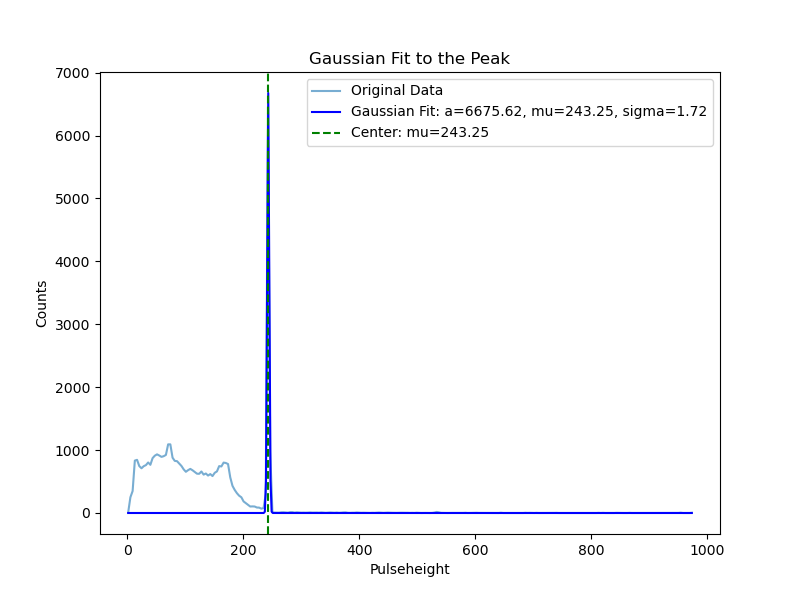

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'cal_Ge_Cs_2.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Extract the relevant columns
x = data['pulseheight']
y = data['counts_ch_A']

# Define the Gaussian function
def gaussian(x, a, mu, sigma):
    return a * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Parameters from the Gaussian fit
a_opt = 6675.62
mu_opt = 243.25
sigma_opt = 1.72

# Generate the fitted Gaussian curve
x_fit = np.linspace(min(x), max(x), 500)
y_fit = gaussian(x_fit, a_opt, mu_opt, sigma_opt)

# Plot the original data and the Gaussian fit
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Original Data', alpha=0.6)
plt.plot(x_fit, y_fit, color='blue', label=f'Gaussian Fit: a={a_opt:.2f}, mu={mu_opt:.2f}, sigma={sigma_opt:.2f}')
plt.axvline(mu_opt, color='green', linestyle='--', label=f'Center: mu={mu_opt:.2f}')
plt.legend()
plt.xlabel('Pulseheight')
plt.ylabel('Counts')
plt.title('Gaussian Fit to the Peak')
plt.show()


In [98]:
area_detector = np.pi * 3**2
surface_globe = 4 * np.pi * (6.5)**2 
Y = area_detector/surface_globe

Ef = 0.3
N = 3582
P = 0.000002
print(Y)
t = 7200
Activiteit = N/(P*Y*t*Ef)
Activiteit_err = np.sqrt(N)/(P*Y*t)
print(Activiteit)
print(Activiteit_err)

Activiteit_safe = (0.001*80)/(31540000*1*0.0000000000001329807)
print(Activiteit_safe)

0.05325443786982249
15569907.407407407
78044.8937734014
19073.90798828518


In [101]:
time = 1600*365.25*24*60*60*(np.log((Activiteit)/(Activiteit_safe)))/(np.log(2))

time_y = time/(365.25*24*60*60)
print(time_y)

15476.710698755705
